# Toby Sax
## week 15 11/28/23
### Pandas DataFrame - Mapping, Applying, and Grouping

In [1]:
import numpy as np

from pandas import Series,DataFrame
import pandas as pd

In [2]:
#map()
df = DataFrame({'city':['Alma','Brian Head','Fox Park','Lake Mary'],'altitude':[10355,9800,9062,8966]})
df

,city,altitude
0,Alma,10355
1,Brian Head,9800
2,Fox Park,9062
3,Lake Mary,8966


In [3]:
st = {'Alma':'Colorado','Brian Head':'Utah','Fox Park':'Wyoming','Lake Mary':'California'}
st

{'Alma': 'Colorado',
 'Brian Head': 'Utah',
 'Fox Park': 'Wyoming',
 'Lake Mary': 'California'}

In [4]:
df['state'] = df['city'].map(st)
df

,city,altitude,state
0,Alma,10355,Colorado
1,Brian Head,9800,Utah
2,Fox Park,9062,Wyoming
3,Lake Mary,8966,California


In [5]:
#apply
df1 = df.copy()
df1

,city,altitude,state
0,Alma,10355,Colorado
1,Brian Head,9800,Utah
2,Fox Park,9062,Wyoming
3,Lake Mary,8966,California


In [6]:
def meter(x):
    return x/3.2808

In [7]:
df['altitude'] = df['altitude'].apply(meter)
df

,city,altitude,state
0,Alma,3156.242380,Colorado
1,Brian Head,2987.076323,Utah
2,Fox Park,2762.131188,Wyoming
3,Lake Mary,2732.870032,California


In [8]:
df2 = df1.copy()
df1['altitude'] = df1['altitude'].apply(meter)
df1

,city,altitude,state
0,Alma,3156.242380,Colorado
1,Brian Head,2987.076323,Utah
2,Fox Park,2762.131188,Wyoming
3,Lake Mary,2732.870032,California


In [9]:
df2['altitude'] = df2['altitude'].apply(lambda x: x/3.2808)
df2

,city,altitude,state
0,Alma,3156.242380,Colorado
1,Brian Head,2987.076323,Utah
2,Fox Park,2762.131188,Wyoming
3,Lake Mary,2732.870032,California


In [10]:
df2['altitude'] = df2['altitude'].apply(lambda x: np.nan if x < 2800 else x*3.2808)
df2

,city,altitude,state
0,Alma,10355.0,Colorado
1,Brian Head,9800.0,Utah
2,Fox Park,NaN,Wyoming
3,Lake Mary,NaN,California


In [11]:
df = DataFrame(np.random.randn(4,3), columns=list('bde'),index=['UT','OH','TX','OR'])
df

,b,d,e
UT,0.209681,-0.402000,0.323237
OH,-1.166388,1.246758,-0.188293
TX,0.223519,-0.623198,0.593075
OR,1.068435,-1.321643,0.603482


In [12]:
df1 = df.copy()
def dif(x):
    return x.max() - x.min()

In [13]:
df.apply(dif)

b    2.234823
d    2.568401
e    0.791774
dtype: float64

In [14]:
df.apply(lambda x: x.max()-x.min())

b    2.234823
d    2.568401
e    0.791774
dtype: float64

In [15]:
df.apply(lambda x: x.max()-x.min(),axis = 1)

UT    0.725238
OH    2.413146
TX    1.216272
OR    2.390078
dtype: float64

In [16]:
df

,b,d,e
UT,0.209681,-0.402000,0.323237
OH,-1.166388,1.246758,-0.188293
TX,0.223519,-0.623198,0.593075
OR,1.068435,-1.321643,0.603482


In [17]:
df.apply(pd.value_counts)

,b,d,e
-1.321643,NaN,1.0,NaN
-1.166388,1.0,NaN,NaN
-0.623198,NaN,1.0,NaN
-0.402000,NaN,1.0,NaN
-0.188293,NaN,NaN,1.0
0.209681,1.0,NaN,NaN
0.223519,1.0,NaN,NaN
0.323237,NaN,NaN,1.0
0.593075,NaN,NaN,1.0
0.603482,NaN,NaN,1.0


In [18]:
df.apply(pd.value_counts).fillna(0)

,b,d,e
-1.321643,0.0,1.0,0.0
-1.166388,1.0,0.0,0.0
-0.623198,0.0,1.0,0.0
-0.402000,0.0,1.0,0.0
-0.188293,0.0,0.0,1.0
0.209681,1.0,0.0,0.0
0.223519,1.0,0.0,0.0
0.323237,0.0,0.0,1.0
0.593075,0.0,0.0,1.0
0.603482,0.0,0.0,1.0


In [19]:
df.apply(pd.value_counts).fillna(0).astype(int)

,b,d,e
-1.321643,0,1,0
-1.166388,1,0,0
-0.623198,0,1,0
-0.402000,0,1,0
-0.188293,0,0,1
0.209681,1,0,0
0.223519,1,0,0
0.323237,0,0,1
0.593075,0,0,1
0.603482,0,0,1


In [20]:
df.apply(pd.value_counts,axis=1).fillna(0).astype(int)

,-1.321643,-1.166388,-0.623198,-0.402000,-0.188293,0.209681,0.223519,0.323237,0.593075,0.603482,1.068435,1.246758
UT,0,0,0,1,0,1,0,1,0,0,0,0
OH,0,1,0,0,1,0,0,0,0,0,0,1
TX,0,0,1,0,0,0,1,0,1,0,0,0
OR,1,0,0,0,0,0,0,0,0,1,1,0


In [21]:
#groupby
df = DataFrame({'brand':['Toyota','Ford','GMC','Ford','Toyota','GMC','GMC'],'price':[40000,25000,30000,35000,50000,35000,32000]})
df

,brand,price
0,Toyota,40000
1,Ford,25000
2,GMC,30000
3,Ford,35000
4,Toyota,50000
5,GMC,35000
6,GMC,32000


In [22]:
df.groupby('brand').sum()

,price
brand,
Ford,60000
GMC,97000
Toyota,90000


In [23]:
df.groupby('brand').mean()

,price
brand,
Ford,30000.000000
GMC,32333.333333
Toyota,45000.000000


In [24]:
df.groupby('brand').count()

,price
brand,
Ford,2
GMC,3
Toyota,2


In [25]:
df.groupby('brand')['price'].count()

brand
Ford      2
GMC       3
Toyota    2
Name: price, dtype: int64

In [27]:
s = df['price'].groupby(df['brand']).count()

In [28]:
s

brand
Ford      2
GMC       3
Toyota    2
Name: price, dtype: int64

In [29]:
type(s)

pandas.core.series.Series

In [30]:
s.index

Index(['Ford', 'GMC', 'Toyota'], dtype='object', name='brand')

In [31]:
df.groupby('brand')[['price']].count()

,price
brand,
Ford,2
GMC,3
Toyota,2


In [32]:
df['cum_sum']=df.groupby('brand')['price'].cumsum()
df

,brand,price,cum_sum
0,Toyota,40000,40000
1,Ford,25000,25000
2,GMC,30000,30000
3,Ford,35000,60000
4,Toyota,50000,90000
5,GMC,35000,65000
6,GMC,32000,97000


In [33]:
df = DataFrame({'date': pd.date_range(start='2023-11-28',periods=8),'category':list('AAAABBBB'), 'value':np.random.randint(10,30,size=8)})
df

,date,category,value
0,2023-11-28,A,11
1,2023-11-29,A,17
2,2023-11-30,A,16
3,2023-12-01,A,29
4,2023-12-02,B,15
5,2023-12-03,B,13
6,2023-12-04,B,17
7,2023-12-05,B,22


In [34]:
df1 =df.copy()
df['cum_sum'] = df['value'].cumsum()
df

,date,category,value,cum_sum
0,2023-11-28,A,11,11
1,2023-11-29,A,17,28
2,2023-11-30,A,16,44
3,2023-12-01,A,29,73
4,2023-12-02,B,15,88
5,2023-12-03,B,13,101
6,2023-12-04,B,17,118
7,2023-12-05,B,22,140


In [35]:
df['cum_sum'] = df.groupby('category')['value'].cumsum()
df

,date,category,value,cum_sum
0,2023-11-28,A,11,11
1,2023-11-29,A,17,28
2,2023-11-30,A,16,44
3,2023-12-01,A,29,73
4,2023-12-02,B,15,15
5,2023-12-03,B,13,28
6,2023-12-04,B,17,45
7,2023-12-05,B,22,67


In [36]:
df = DataFrame({'k1':['a','a','b','b','c'],
               'k2':['one','two','one','two','one'],
               'dataser1':np.random.randn(5),
               'dataset2': np.random.randn(5)})
df

,k1,k2,dataser1,dataset2
0,a,one,1.200647,0.132269
1,a,two,-0.446297,1.055325
2,b,one,-0.176295,0.394349
3,b,two,0.094941,0.326355
4,c,one,-0.463578,-0.758207


In [37]:
df.groupby('k1').count()

,k2,dataser1,dataset2
k1,,,
a,2,2,2
b,2,2,2
c,1,1,1


In [38]:
df.groupby('k1').mean()

,dataser1,dataset2
k1,,
a,0.377175,0.593797
b,-0.040677,0.360352
c,-0.463578,-0.758207


In [39]:
df.groupby('k2').mean()

,dataser1,dataset2
k2,,
one,0.186925,-0.077196
two,-0.175678,0.690840


In [40]:
df.groupby(['k1','k2']).sum()

dataser1  dataset2
k1 k2                     
a  one  1.200647  0.132269
   two -0.446297  1.055325
b  one -0.176295  0.394349
   two  0.094941  0.326355
c  one -0.463578 -0.758207

In [41]:
df

,k1,k2,dataser1,dataset2
0,a,one,1.200647,0.132269
1,a,two,-0.446297,1.055325
2,b,one,-0.176295,0.394349
3,b,two,0.094941,0.326355
4,c,one,-0.463578,-0.758207


In [42]:
df['dataser1'].groupby(df['k1']).mean()

k1
a    0.377175
b   -0.040677
c   -0.463578
Name: dataser1, dtype: float64

In [43]:
df.groupby('k1')[['dataser1']].sum()

,dataser1
k1,
a,0.754349
b,-0.081353
c,-0.463578


In [44]:
df.groupby('k2')[['dataser1']].sum()

,dataser1
k2,
one,0.560774
two,-0.351356


In [45]:
df.groupby(['k1','k2'])[['dataser1']].mean()

dataser1
k1 k2           
a  one  1.200647
   two -0.446297
b  one -0.176295
   two  0.094941
c  one -0.463578

In [46]:
type(df.groupby(['k1','k2'])[['dataser1']].mean())

pandas.core.frame.DataFrame

In [47]:
group = df.groupby(['k1','k2'])[['dataser1']]
group

In [48]:
group.sum()

dataser1
k1 k2           
a  one  1.200647
   two -0.446297
b  one -0.176295
   two  0.094941
c  one -0.463578

In [49]:
group.mean()

dataser1
k1 k2           
a  one  1.200647
   two -0.446297
b  one -0.176295
   two  0.094941
c  one -0.463578

In [53]:
# Plotting Data Using pandas
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2023',periods=1000))
s

2023-01-01   -0.636977
2023-01-02    0.945415
2023-01-03   -0.161659
2023-01-04    0.359770
2023-01-05   -0.067495
                ...   
2025-09-22   -0.272733
2025-09-23    0.451347
2025-09-24    0.260375
2025-09-25   -1.294228
2025-09-26    0.713879
Freq: D, Length: 1000, dtype: float64

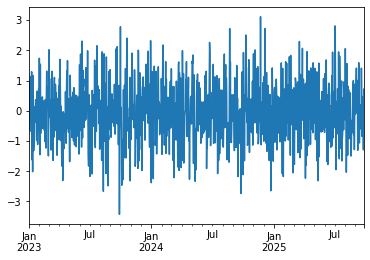

In [54]:
s.plot()

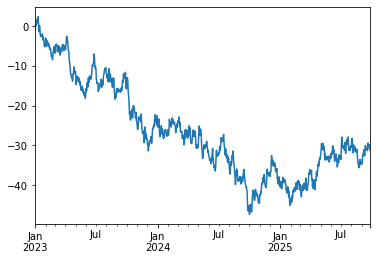

In [56]:
s = s.cumsum()
s.plot()

In [57]:
df = DataFrame(np.random.randn(1000,4),index=s.index, columns=list('ABCD'))
df = df.cumsum()
df

,A,B,C,D
2023-01-01,-0.711754,-1.860143,-0.336002,0.614531
2023-01-02,-1.718559,-1.650426,0.421954,1.187608
2023-01-03,-2.106784,-1.448256,0.698716,1.907595
2023-01-04,-3.657939,-0.444634,0.655452,1.043467
2023-01-05,-4.133747,-0.283438,-0.469552,2.226504
...,...,...,...,...
2025-09-22,-26.898113,-4.354262,47.746335,-12.765792
2025-09-23,-26.428068,-3.798831,47.896687,-13.540724
2025-09-24,-26.566893,-2.360950,48.692982,-14.499137
2025-09-25,-24.983156,-2.033916,48.875185,-12.870131


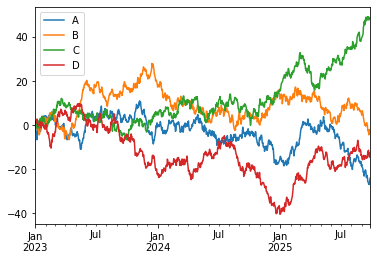

In [58]:
df.plot()

In [59]:
df = pd.DataFrame(np.random.randn(1000,2),columns=['B','C']).cumsum()
df

,B,C
0,-1.641577,-0.573176
1,-2.039481,0.675861
2,-1.668572,0.813849
3,-1.939126,1.089623
4,-1.240416,2.001623
...,...,...
995,53.896801,52.382266
996,53.535979,50.912835
997,52.396734,53.005930
998,53.194274,50.137891


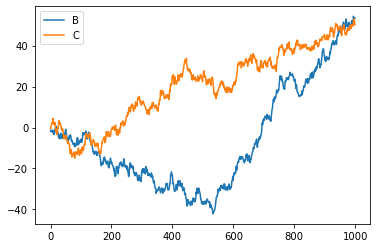

In [60]:
df.plot()

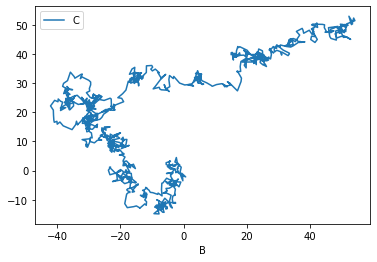

In [61]:
df.plot(x='B', y='C')

In [62]:
df

,B,C
0,-1.641577,-0.573176
1,-2.039481,0.675861
2,-1.668572,0.813849
3,-1.939126,1.089623
4,-1.240416,2.001623
...,...,...
995,53.896801,52.382266
996,53.535979,50.912835
997,52.396734,53.005930
998,53.194274,50.137891


In [63]:
df['A']=pd.Series(list(df.index))
df

,B,C,A
0,-1.641577,-0.573176,0
1,-2.039481,0.675861,1
2,-1.668572,0.813849,2
3,-1.939126,1.089623,3
4,-1.240416,2.001623,4
...,...,...,...
995,53.896801,52.382266,995
996,53.535979,50.912835,996
997,52.396734,53.005930,997
998,53.194274,50.137891,998


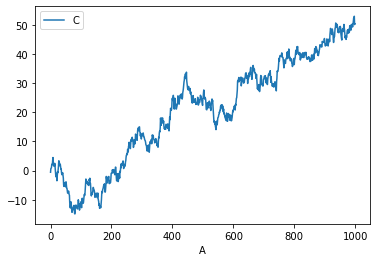

In [64]:
df.plot(x='A',y='C')

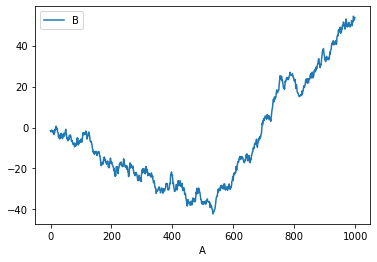

In [65]:
df.plot(x='A',y='B')